# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: U, Emmanuel\
_Student No._: 2020-11017\
_Section_: THU-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Emmanuel Joseph Lee D.G. U

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [74]:
# Number 1

import math
import numpy as np

# First, we define the function f(x) = 2x^4 + 3x^2 + 4x + 5 as a Python function so that we may call it easier in the future.

def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

# We then define some parameters we will need to perform the integration.

a = 0 # a represents the starting point of the integration
b = 5 # b represents the ending point of the integration]
N = np.array([10, 100, 1000]) # N represents the amount of slices we will use in for the trapezoidal rule. Since we will test multiple values of N, we utilize a numpy array.

# We then define a function that performs the integral using the trapezoidal rule for a given set of parameters.
# We use the formula for the trapezoidal rule in Newman's "Computational Physics".
# Input - A function f(x), a starting point a, an ending point b, and the number of slices n
# Output - The integral of f(x) from a to b from the trapezoidal rule using the number of slices n

def trapezoidal_integral(f, a, b, n):
    h_1 = (b-a)/n # h_1 represents the width of each interval.

    s_1 = h_1*(f(a)/2 + f(b)/2) # These are the first 2 terms of the trapezoidal rule.
    for k in range (1, n):
        s_1 += h_1*f(a + k*h_1) # These are the summation terms in the trapezoidal rule. Here, we use a for loop to calculate the summation.
    return s_1

# We may then use this function to define an array that contains the results of the integration using 10, 100, and 1000 slices.
# The 1st, 2nd, and 3rd terms of the array reprsent the N = 10, N = 100, N = 1000 cases respectively. This will be the case for all arrays in this problem.

results_trapezoidal = np.array([trapezoidal_integral(f, a, b, N[0]),
            trapezoidal_integral(f, a, b, N[1]),
            trapezoidal_integral(f, a, b, N[2])])

print("Trapezoidal Rule Results: " + str(results_trapezoidal))

Trapezoidal Rule Results: [1471.4375     1450.21458125 1450.00214583]


In [75]:
# Number 2

# Calculating the integral by hand, we find that the value of the integral is 1450. We may then use this value to calculate the percentage errors.

# We define a function error(x) that calculates the percentage error of a value against 1450.

def error(x):
    err_1 = abs((1450 - x)/1450)
    return err_1

# We call the function error(x) on our previous array of results to create an array that gives the percentage error for each trial.

Errors_trapezoidal = error(results_trapezoidal)

print("Trapezoidal Rule Percentage Errors: " + str(Errors_trapezoidal))

Trapezoidal Rule Percentage Errors: [1.47844828e-02 1.47987069e-04 1.47988491e-06]


In [76]:
# Number 3

# We then define a function that performs the integral using Simpson's rule for a given set of parameters.
# We refer to the formula for Simpson's rule found in Newman's "Computational Physics".
# Input - A function f(x), a starting point a, an ending point b, and the number of slices n
# Output - The integral of f(x) from a to b from Simpson's rule using the number of slices n

def simpsons_integral(f, a, b, n):
    h_2 = (b-a)/n # h_2 is the size of each interval.

    s_2 = f(a)+f(b) # These are the first 2 terms in the Simpson's rule formula.
    for k in range (1, n, 2): # Again, we use a for loop to calculate the summation. This is the summation for odd n from the formula.
        s_2 += 4*f(a+k*h_2)
    for k in range (2, n, 2): # This is the summation for even n from the formula.
        s_2 += 2*f(a+k*h_2)
    s_2 = (1/3)*h_2*s_2 # We multiply by some constants as per the formula.

    return s_2

# Again, take note of the results using an array.

results_simpsons = np.array([simpsons_integral(f, a, b, N[0]),
            simpsons_integral(f, a, b, N[1]),
            simpsons_integral(f, a, b, N[2])])

print("Simpson's Rule Results: " + str(results_simpsons))

Simpson's Rule Results: [1450.08333333 1450.00000833 1450.        ]


In [77]:
# Number 4

# Using our error function from Number 2, we easily create an array for the percentage error from using Simpson's rule.

Errors_simpsons = error(results_simpsons)

print("Simpson's Rule Percentage Errors: " + str(Errors_simpsons))

# Simpson's Rule provides a far more accurate approximation compared to the trapezoidal rule.
# The accuracy that Simpson's Rule provides is many orders of magnitude greater than the trapezoidal rule for the same number of slices.

Simpson's Rule Percentage Errors: [5.74712644e-05 5.74712666e-09 5.75176994e-13]


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [78]:
# Number 1

# According to Appendix E, the Gaussian quadrature method can be defined with the function below.

# Note: The following code is not mine (Including comments). It comes from Appendix E of Newman's "Computational Physics", as requested by the problem.

from numpy import ones, copy, cos, tan, pi, linspace

def gaussxw(N):
    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3, 4*N-1, N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N, float)
        p1 = copy(x)
        for k in range(1, N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x, w

def gaussxwab(N, a, b):
    x, w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a), 0.5*(b-a)*w

In [79]:
# Number 2

# First, we define the parameters we will need to use the Gaussian quadrature method.

N = 3 # N represents the number of slices, as given by the problem.
a = 0 # a represents the starting point of the integration.
b = 5 # b represents the ending point of the integration.

# We then define the function f(x) that we are taking the integral of.

def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

# When computing an integral using the Gaussian quadrature method, we must first compute the sample points and weights.
# After that, we may use Eq. (5.63) from Newman's "Computational Physics" to compute for the integral.
# Let us define a Gaussian quadrature function using the gaussxw function from Number 1.

def gauss_quad(N, f, a, b):
    x, w = gaussxw(N) # This finds N pairs of sample points x and weights w through the gaussxw function.
    xp = (1/2)*(b-a)*x + (1/2)*(b+a) # This rescales the x coordinate axis since it doesn't match the width of the original integral used to caluclate it.
    wp = (1/2)*(b-a)*w # This rescales the weights as a result of the rescaling of the coordinate axis.

    # We then take the sum from Eq. (5.63) using a for loop. We must first specify that s = 0 otherwise the line in the for loop cannot run.

    s = 0
    for k in range(N):
        s += wp[k]*f(xp[k])

    return s

# We store the result of our integration in the variable results_gauss.

results_gauss = gauss_quad(N, f, a, b)

print("Gaussian Quadrature Method Results: " + str(results_gauss))

Gaussian Quadrature Method Results: 1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

In [82]:
import numpy as np
import math

# Number 1

# Let us begin by defining the parameters needed to perform the integration.
# Notice how Number 2 is asking us for a graph of the period T against amplitude a. This tell us that we need to compute multiple integrals for a range of a so that
# we have more data points to work with. We shall use the linspace function for this.

m = 1 # m represents the mass of the particle.
N = 20 # N represents the number of sample points used in the Gaussian Quadrature method.
amp = linspace(0.1, 3, N) # We use the linspace function to get an array of N = 20 values of a from 0.1 to 3. This range can be replaced, I simply chose it arbitrarily.
start = 0 # start represents the starting point of the integral.

# We define the function inside of the given integral. We are given V(x) = x**4

def f(x):
  return np.sqrt(8*m)/np.sqrt(a**4-x**4)

# We may then use a for loop in order to solve the integral for every value in our range of amplitudes a.
# We store our data in an array labeled

T = []
for a in amp:
  T.append(gauss_quad(N, f, start, amp))

<ipython-input-82-a6b6cdad6e6e>:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(8*m)/np.sqrt(a**4-x**4)


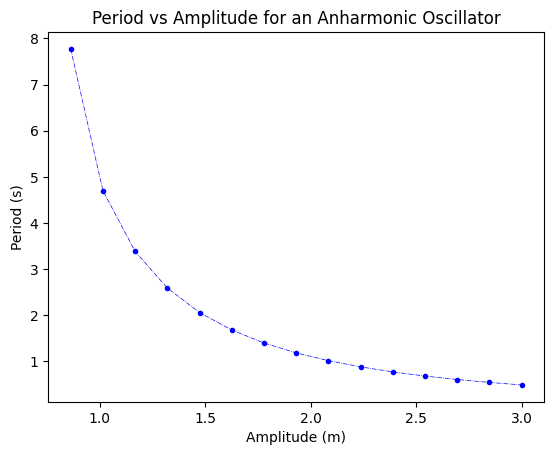

In [83]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Number 2

# We now plot our data from the previous question.

# In the case of a simple harmonic oscillator, period is independent of amplitude. A famous example of this is a guitar string. A guitar string will always vibrate
# at the same frequency no matter how hard it is plucked. However, in the case of the anharmonic oscillator, specifically one with a potential of the form V(x) = x^4,
# we observe an inverse relationship between amplitude and period.

fig, ax = plt.subplots()
plot = ax.plot(amp, T, marker = '.', color = 'b')
mpl.rc('lines', linewidth=0.5, linestyle='-.')
ax.set_title("Period vs Amplitude for an Anharmonic Oscillator")
ax.set_ylabel("Period (s)")
ax.set_xlabel("Amplitude (m)")

plt.show()